## Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
from sklearn.linear_model import LinearRegression

## Data input

In [2]:
df = pd.read_csv("data.csv")
x = np.array(df["km"])
y = np.array(df["price"])

## Plot

Text(0, 0.5, 'prices')

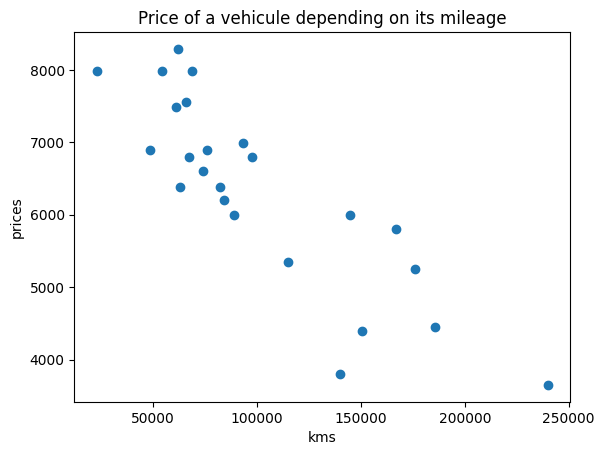

In [3]:
plt.scatter(x, y)
plt.title("Price of a vehicule depending on its mileage")
plt.xlabel("kms")
plt.ylabel("prices")

## Testing library linear_regression

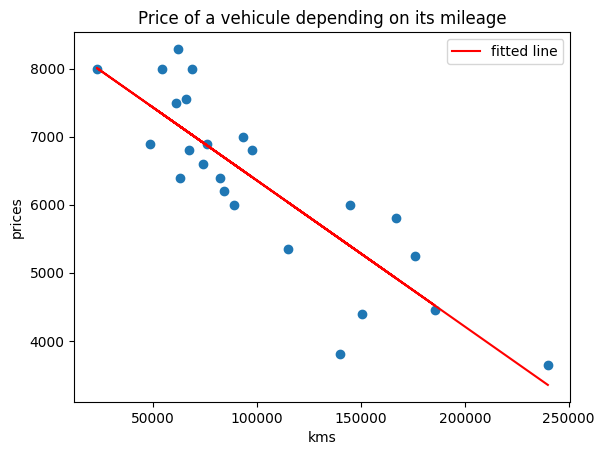

In [4]:
res = stats.linregress(x,y)
plt.scatter(x, y)
plt.title("Price of a vehicule depending on its mileage")
plt.xlabel("kms")
plt.ylabel("prices")

# print(res.intercept, res.slope)
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

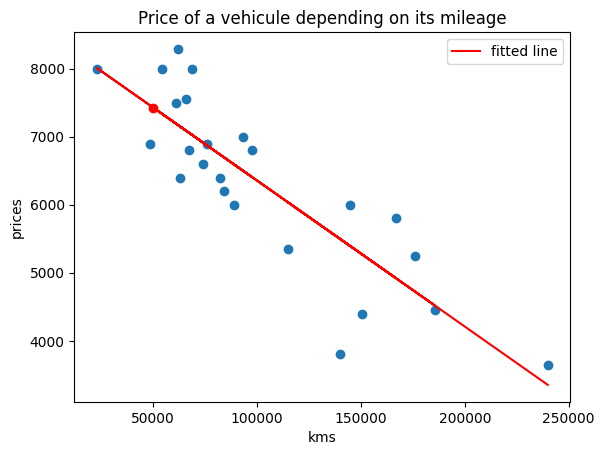

In [5]:
plt.scatter(x, y)
plt.title("Price of a vehicule depending on its mileage")
plt.xlabel("kms")
plt.ylabel("prices")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
test_value = 50000
plt.plot(test_value, test_value*res.slope + res.intercept, 'or', label='prediction')
plt.show()

In [6]:
def normalize(data):
    max = np.max(data)
    min = np.min(data)
    mean = np.mean(data)
    return np.divide(np.subtract(data, mean), (max - min))

def denormalize(data, norm_data):
    max = np.max(data)
    min = np.min(data)
    mean = np.mean(data)
    return np.add(np.multiply(norm_data, (max - min)), mean)


normalized_x = normalize(x)
# normalized_y = normalize(y)


print(normalized_x)
# print(denormalize(x, normalized_x), denormalize(y,normalized_y))

[ 0.63994984  0.1784135   0.22769932  0.38905279  0.34515617  0.06325973
  0.30277958 -0.05557897  0.20006241 -0.07860973 -0.08768845 -0.17506253
 -0.12467124 -0.01642669 -0.15691429 -0.11534378 -0.24334872 -0.03715437
 -0.18478611 -0.16302205 -0.21679426 -0.15000507 -0.36005016 -0.18091695]


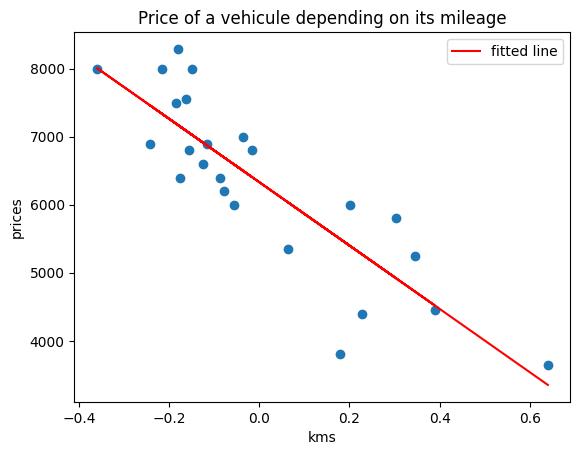

In [7]:
res = stats.linregress(normalized_x,y)
plt.scatter(normalized_x, y)
plt.title("Price of a vehicule depending on its mileage")
plt.xlabel("kms")
plt.ylabel("prices")
plt.plot(normalized_x, res.intercept + res.slope*normalized_x, 'r', label='fitted line')
plt.legend()
plt.show()

#### Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


In [8]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (array): Data, m examples 
      y (array): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    m = x.size
    total_cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = (f_wb - y[i]) ** 2
        total_cost = total_cost + cost
    total_cost = (1 / (2 * m)) * total_cost
    
    return total_cost

## The gradient is defined as:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [9]:
def compute_gradient(x, y , w, b):
    m = x.size
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    
    return dj_dw, dj_db

In [15]:
def gradient_descent(x, y, w, b, alpha, iters):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      alpha (float):     Learning rate
      iters (int):   number of iterations to run gradient descent
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
    """
    
    J_history = []
    p_history = []
    
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_cost(x, y, w , b))
            p_history.append([w,b])
        if i% math.ceil(iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b

In [23]:
iters = 10000
alpha = 0.01

w_final, b_final = gradient_descent(normalized_x, y, 0, 0, alpha, iters)
print(w_final, b_final)

Iteration    0: Cost 2.05e+07  dj_dw:  2.627e+02, dj_db: -6.332e+03   w: -2.627e+00, b: 6.33183e+01
Iteration 1000: Cost 4.20e+05  dj_dw:  1.494e+02, dj_db: -2.734e-01   w: -2.010e+03, b: 6.33156e+03
Iteration 2000: Cost 2.87e+05  dj_dw:  8.498e+01, dj_db: -1.180e-05   w: -3.151e+03, b: 6.33183e+03
Iteration 3000: Cost 2.44e+05  dj_dw:  4.833e+01, dj_db: -5.087e-10   w: -3.800e+03, b: 6.33183e+03
Iteration 4000: Cost 2.30e+05  dj_dw:  2.749e+01, dj_db: -4.483e-11   w: -4.170e+03, b: 6.33183e+03
Iteration 5000: Cost 2.25e+05  dj_dw:  1.563e+01, dj_db: -4.498e-11   w: -4.380e+03, b: 6.33183e+03
Iteration 6000: Cost 2.24e+05  dj_dw:  8.892e+00, dj_db: -4.494e-11   w: -4.499e+03, b: 6.33183e+03
Iteration 7000: Cost 2.23e+05  dj_dw:  5.058e+00, dj_db: -4.489e-11   w: -4.567e+03, b: 6.33183e+03
Iteration 8000: Cost 2.23e+05  dj_dw:  2.877e+00, dj_db: -4.493e-11   w: -4.606e+03, b: 6.33183e+03
Iteration 9000: Cost 2.23e+05  dj_dw:  1.636e+00, dj_db: -4.487e-11   w: -4.628e+03, b: 6.33183e+03


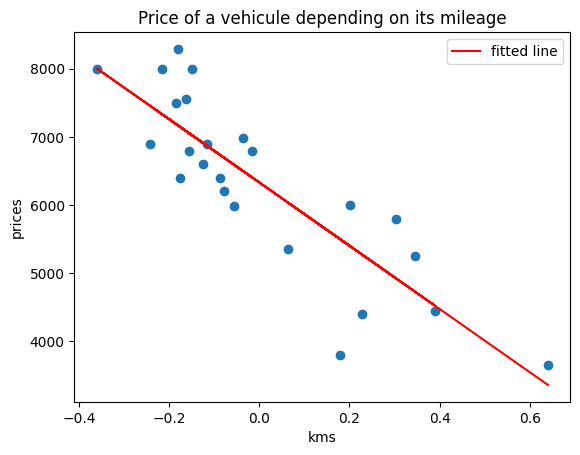

In [24]:
plt.scatter(normalized_x, y)
plt.title("Price of a vehicule depending on its mileage")
plt.xlabel("kms")
plt.ylabel("prices")
plt.plot(normalized_x, b_final + w_final*normalized_x, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
print(thet0 * input() + thet1)